<a href="https://colab.research.google.com/github/mdelretobey/property_investment/blob/main/NYC_property_investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.multicomp as mc

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Original Data File Found:** https://www.kaggle.com/new-york-city/nyc-property-sales

Data consists of two years of sales data for all types of properties in NYC from 2016-2017.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/nyc-rolling-sales-modified.csv')
df.head()

#downloading csv file to work on in a dataframe and checking that it loaded correctly

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE MONTH,SALE QUARTER,Unnamed: 24
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,7/19/2017 0:00,7,Q3,NaN
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,0,12/14/2016 0:00,7,Q3,NaN
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,0,12/9/2016 0:00,7,Q3,NaN
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,9/23/2016 0:00,7,Q3,NaN
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,11/17/2016 0:00,7,Q3,NaN


In [ ]:
df.describe
#checking the number of rows and columns

<bound method NDFrame.describe of        Unnamed: 0  BOROUGH   NEIGHBORHOOD  ... SALE MONTH SALE QUARTER  Unnamed: 24
0               4        1  ALPHABET CITY  ...          7           Q3          NaN
1               5        1  ALPHABET CITY  ...          7           Q3          NaN
2               6        1  ALPHABET CITY  ...          7           Q3          NaN
3               7        1  ALPHABET CITY  ...          7           Q3          NaN
4               8        1  ALPHABET CITY  ...          7           Q3          NaN
...           ...      ...            ...  ...        ...          ...          ...
84543        8409        5        WOODROW  ...          1           Q1          NaN
84544        8410        5        WOODROW  ...          1           Q1          NaN
84545        8411        5        WOODROW  ...          1           Q1          NaN
84546        8412        5        WOODROW  ...          1           Q1          NaN
84547        8413        5        WOODROW 

In [ ]:
df.isnull().sum()
#checking for null entries and ready to start analysis 

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
SALE MONTH                            0
SALE QUARTER                          0
Unnamed: 24                       84548


**First Analysis Question**: Is there a significant variance in the pricing between properties sold in different times of the year? Comparison will be between the four Quarters of each year in the records.

In [ ]:
stats.f_oneway(df['SALE PRICE'][df['SALE QUARTER'] == 'Q1'],
               df['SALE PRICE'][df['SALE QUARTER'] == 'Q2'],
               df['SALE PRICE'][df['SALE QUARTER'] == 'Q3'],
               df['SALE PRICE'][df['SALE QUARTER'] == 'Q4'])

F_onewayResult(statistic=1.88602550764907, pvalue=0.12949246241244908)

Not enough data found to determine a significant difference between each quarter without filtering the data. Next step is to check the data to see how it should be filtered.

In [ ]:
df['SALE PRICE'].describe()

count    8.454800e+04
mean     1.056623e+06
std      1.038794e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.150000e+05
75%      8.300000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

We see the min and the bottom 25% are both 0, upon inspecting the original csv it's found that those are transfers of property or inherited property

In [ ]:
#Excluding all values below 1000 to only track true sales 
c_sale = df[df['SALE PRICE']>1000]
print(c_sale.shape)

(58604, 25)


This cut out about 28,000 rows so it should impact the data so lets try the ANOVA test again

In [ ]:
stats.f_oneway(c_sale['SALE PRICE'][c_sale['SALE QUARTER'] == 'Q1'],
               c_sale['SALE PRICE'][c_sale['SALE QUARTER'] == 'Q2'],
               c_sale['SALE PRICE'][c_sale['SALE QUARTER'] == 'Q3'],
               c_sale['SALE PRICE'][c_sale['SALE QUARTER'] == 'Q4'])

F_onewayResult(statistic=1.969208442837514, pvalue=0.11620447880838634)

Still no significant variance found so lets visualize the data to see if we can figure out why.

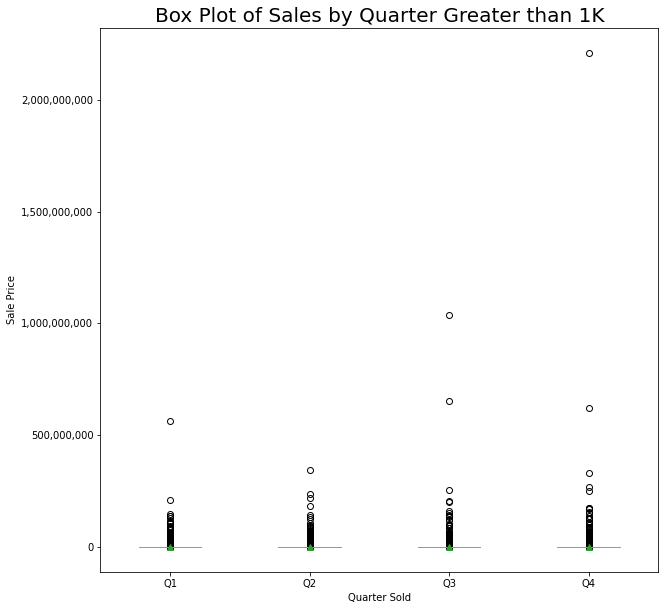

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Sales by Quarter Greater than 1K", fontsize= 20)
ax.set

data = [c_sale['SALE PRICE'][c_sale['SALE QUARTER'] == 'Q1'],
        c_sale['SALE PRICE'][c_sale['SALE QUARTER'] == 'Q2'],
        c_sale['SALE PRICE'][c_sale['SALE QUARTER'] == 'Q3'],
        c_sale['SALE PRICE'][c_sale['SALE QUARTER'] == 'Q4']]

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.boxplot(data,
           labels= ['Q1', 'Q2', 'Q3', 'Q4'],
           showmeans= True)

plt.xlabel("Quarter Sold")
plt.ylabel("Sale Price")

plt.show()

Some pretty big outliers in the data including one sale that's over 2B

In [ ]:
#limiting the sales to up to 5M to exlcude outliers from the calculations
f_sale = c_sale[c_sale['SALE PRICE']<=5000000]
print(f_sale.shape)

(56277, 25)


cut out about another 2,000 rows so we can try the ANOVA test once more

In [ ]:
stats.f_oneway(f_sale['SALE PRICE'][f_sale['SALE QUARTER'] == 'Q1'],
               f_sale['SALE PRICE'][f_sale['SALE QUARTER'] == 'Q2'],
               f_sale['SALE PRICE'][f_sale['SALE QUARTER'] == 'Q3'],
               f_sale['SALE PRICE'][f_sale['SALE QUARTER'] == 'Q4'])

F_onewayResult(statistic=13.03017304581247, pvalue=1.6714405501976246e-08)

Significant variance found once the limiting factors have been applied of sales prices between 1k and 5M

In [ ]:
#Running Tukey HSD test to determine where the difference is located 
comp = mc.MultiComparison(f_sale['SALE PRICE'], f_sale['SALE QUARTER'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Q1,Q2,-50314.8266,0.001,-74412.7231,-26216.9302,True
Q1,Q3,-27502.6863,0.0176,-51582.3157,-3423.057,True
Q1,Q4,-1702.638,0.9,-25730.967,22325.691,False
Q2,Q3,22812.1403,0.0697,-1195.337,46819.6176,False
Q2,Q4,48612.1886,0.001,24656.1662,72568.2111,True
Q3,Q4,25800.0483,0.0288,1862.4012,49737.6954,True


Accoring to the Tukey test we see a decrease in price from Q1 to Q2 and Q3 and an increase from Q2/3 to Q4. No significant difference found between pricing in Q2 and Q3. From this we can conclude the best time to purchase properties within these pricing limits is Q2-Q3.

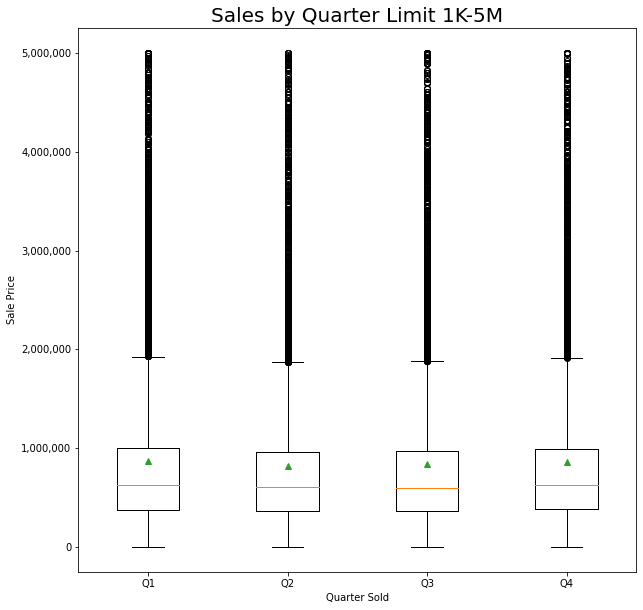

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Sales by Quarter Limit 1K-5M", fontsize= 20)
ax.set

data = [f_sale['SALE PRICE'][f_sale['SALE QUARTER'] == 'Q1'],
        f_sale['SALE PRICE'][f_sale['SALE QUARTER'] == 'Q2'],
        f_sale['SALE PRICE'][f_sale['SALE QUARTER'] == 'Q3'],
        f_sale['SALE PRICE'][f_sale['SALE QUARTER'] == 'Q4']]

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.boxplot(data,
           labels= ['Q1', 'Q2', 'Q3', 'Q4'],
           showmeans= True)

plt.xlabel("Quarter Sold")
plt.ylabel("Sale Price")

plt.show()

Visualization is difficult to see differences but upon close inspection does show Q2/3 being lower than Q1/4

**Second Analysis Question:** Is there a significant difference between the pricing of residential rental properties compared to commercial rental properties? First we will check the types of building classes to determine how to filter the data.

In [ ]:
df['BUILDING CLASS CATEGORY'].unique()

array(['07 RENTALS - WALKUP APARTMENTS             ',
       '08 RENTALS - ELEVATOR APARTMENTS           ',
       '09 COOPS - WALKUP APARTMENTS               ',
       '10 COOPS - ELEVATOR APARTMENTS             ',
       '11A CONDO-RENTALS                           ',
       '12 CONDOS - WALKUP APARTMENTS              ',
       '13 CONDOS - ELEVATOR APARTMENTS            ',
       '14 RENTALS - 4-10 UNIT                     ',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
       '17 CONDO COOPS                             ',
       '22 STORE BUILDINGS                         ',
       '37 RELIGIOUS FACILITIES                    ',
       '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC  ',
       '46 CONDO STORE BUILDINGS                   ',
       '47 CONDO NON-BUSINESS STORAGE              ',
       '01 ONE FAMILY DWELLINGS                    ',
       '02 TWO FAMILY DWELLINGS                    ',
       '03 THREE FAMILY DWE

For the residential portion we will look at one, two, and three family dwellings, class 1 condos, and 2-10 unit condos that are for residential purposes

In [ ]:
res_rental = df.loc[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS                    ') | 
                    (df['BUILDING CLASS CATEGORY'] == '02 TWO FAMILY DWELLINGS                    ') |
                    (df['BUILDING CLASS CATEGORY'] == '03 THREE FAMILY DWELLINGS                  ') |
                    (df['BUILDING CLASS CATEGORY'] == '04 TAX CLASS 1 CONDOS                      ') |
                    (df['BUILDING CLASS CATEGORY'] == '15 CONDOS - 2-10 UNIT RESIDENTIAL          ') ]

In [ ]:
#checking for how many entries there are with these filters to make sure it's big enough to work with
res_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41384 entries, 176 to 84545
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      41384 non-null  int64  
 1   BOROUGH                         41384 non-null  int64  
 2   NEIGHBORHOOD                    41384 non-null  object 
 3   BUILDING CLASS CATEGORY         41384 non-null  object 
 4   TAX CLASS AT PRESENT            41384 non-null  object 
 5   BLOCK                           41384 non-null  int64  
 6   LOT                             41384 non-null  int64  
 7   EASE-MENT                       41384 non-null  object 
 8   BUILDING CLASS AT PRESENT       41384 non-null  object 
 9   ADDRESS                         41384 non-null  object 
 10  APARTMENT NUMBER                41384 non-null  object 
 11  ZIP CODE                        41384 non-null  int64  
 12  RESIDENTIAL UNITS             

In [ ]:
#since we know there are outliers that effect the price from the first question we will apply the same parameters to this comparison for pricing
r_rental = res_rental[(res_rental['SALE PRICE'] > 1000) &
                      (res_rental['SALE PRICE'] <= 5000000)]
r_rental['SALE PRICE'].describe()

count    2.696200e+04
mean     7.136271e+05
std      5.205459e+05
min      1.162000e+03
25%      4.196660e+05
50%      5.870000e+05
75%      8.500000e+05
max      5.000000e+06
Name: SALE PRICE, dtype: float64

For the commercial end we are going to look at apartment units through rentals and condos and 2-10 unit condos for commercial purposes

In [ ]:
comm_rental = df.loc[(df['BUILDING CLASS CATEGORY'] == '07 RENTALS - WALKUP APARTMENTS             ') | 
                     (df['BUILDING CLASS CATEGORY'] == '08 RENTALS - ELEVATOR APARTMENTS           ') |
                     (df['BUILDING CLASS CATEGORY'] == '12 CONDOS - WALKUP APARTMENTS              ') |
                     (df['BUILDING CLASS CATEGORY'] == '13 CONDOS - ELEVATOR APARTMENTS            ') |
                     (df['BUILDING CLASS CATEGORY'] == '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ') ]

In [ ]:
#checking that there are enough entries again
comm_rental.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17859 entries, 0 to 84170
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      17859 non-null  int64  
 1   BOROUGH                         17859 non-null  int64  
 2   NEIGHBORHOOD                    17859 non-null  object 
 3   BUILDING CLASS CATEGORY         17859 non-null  object 
 4   TAX CLASS AT PRESENT            17859 non-null  object 
 5   BLOCK                           17859 non-null  int64  
 6   LOT                             17859 non-null  int64  
 7   EASE-MENT                       17859 non-null  object 
 8   BUILDING CLASS AT PRESENT       17859 non-null  object 
 9   ADDRESS                         17859 non-null  object 
 10  APARTMENT NUMBER                17859 non-null  object 
 11  ZIP CODE                        17859 non-null  int64  
 12  RESIDENTIAL UNITS               

In [ ]:
#applying the same parameters as the first part of the comparison
c_rental = comm_rental[(comm_rental['SALE PRICE'] > 1000) &
                       (comm_rental['SALE PRICE'] <= 5000000)]
c_rental['SALE PRICE'].describe()

count    1.152100e+04
mean     1.345803e+06
std      1.028855e+06
min      1.175000e+03
25%      6.350000e+05
50%      9.970000e+05
75%      1.735876e+06
max      5.000000e+06
Name: SALE PRICE, dtype: float64

In [ ]:
stats.ttest_ind(r_rental['SALE PRICE'], c_rental['SALE PRICE'])

Ttest_indResult(statistic=-79.78675038207379, pvalue=0.0)

Found significant difference at the 95% level between the two sales comparisons. Going to check confidence interval to determine where that difference lies.

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(r_rental['SALE PRICE'], c_rental['SALE PRICE'])

'The difference in means at the 95% confidence interval (two-tail) is between 612387.9252968371 and 651964.2899631372.'

with 95% confidence interval we can determine that the commercial properties are about 600k-650k more expensive on average

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


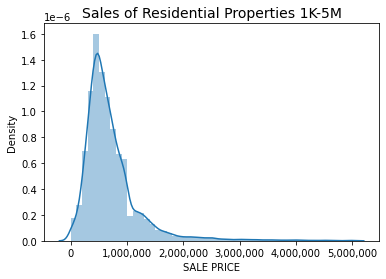

In [ ]:
ax = sns.distplot(r_rental['SALE PRICE'])

ax.set_title("Sales of Residential Properties 1K-5M", fontsize= 14 )
ax.set

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


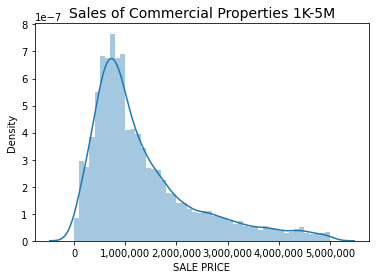

In [ ]:
ax = sns.distplot(c_rental['SALE PRICE'])

ax.set_title("Sales of Commercial Properties 1K-5M", fontsize= 14 )
ax.set

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

**Combining First Two Questions:** Is there a best time of year to buy residential or commercial properties?

In [ ]:
stats.f_oneway(r_rental['SALE PRICE'][r_rental['SALE QUARTER'] == 'Q1'],
               r_rental['SALE PRICE'][r_rental['SALE QUARTER'] == 'Q2'],
               r_rental['SALE PRICE'][r_rental['SALE QUARTER'] == 'Q3'],
               r_rental['SALE PRICE'][r_rental['SALE QUARTER'] == 'Q4'])

F_onewayResult(statistic=5.018668823707678, pvalue=0.001772677199688095)

In [ ]:
comp = mc.MultiComparison(r_rental['SALE PRICE'], r_rental['SALE QUARTER'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Q1,Q2,19037.5053,0.154,-4283.3441,42358.3548,False
Q1,Q3,2495.4668,0.9,-20508.9857,25499.9193,False
Q1,Q4,-15719.3443,0.2958,-38737.6411,7298.9526,False
Q2,Q3,-16542.0385,0.2532,-39601.2641,6517.187,False
Q2,Q4,-34756.8496,0.001,-57829.8867,-11683.8125,True
Q3,Q4,-18214.8111,0.1677,-40968.0055,4538.3833,False


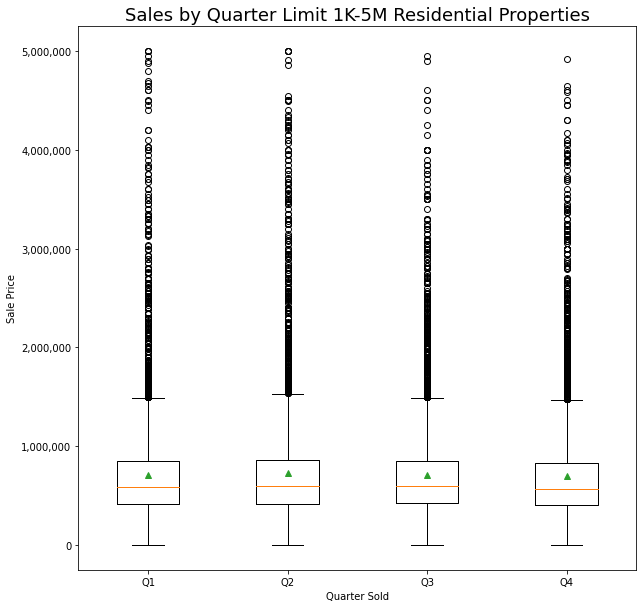

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Sales by Quarter Limit 1K-5M Residential Properties", fontsize= 18)
ax.set

data = [r_rental['SALE PRICE'][r_rental['SALE QUARTER'] == 'Q1'],
        r_rental['SALE PRICE'][r_rental['SALE QUARTER'] == 'Q2'],
        r_rental['SALE PRICE'][r_rental['SALE QUARTER'] == 'Q3'],
        r_rental['SALE PRICE'][r_rental['SALE QUARTER'] == 'Q4']]

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.boxplot(data,
           labels= ['Q1', 'Q2', 'Q3', 'Q4'],
           showmeans= True)


#ax.ticklabel_format(axis= 'y',style='plain')

plt.xlabel("Quarter Sold")
plt.ylabel("Sale Price")

plt.show()

For residential properties it looks like Q4 is the best time on average to purchase.

In [ ]:
stats.f_oneway(c_rental['SALE PRICE'][c_rental['SALE QUARTER'] == 'Q1'],
               c_rental['SALE PRICE'][c_rental['SALE QUARTER'] == 'Q2'],
               c_rental['SALE PRICE'][c_rental['SALE QUARTER'] == 'Q3'],
               c_rental['SALE PRICE'][c_rental['SALE QUARTER'] == 'Q4'])

F_onewayResult(statistic=9.927767535713642, pvalue=1.5605846592822897e-06)

In [ ]:
comp = mc.MultiComparison(c_rental['SALE PRICE'], c_rental['SALE QUARTER'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Q1,Q2,-121304.8873,0.001,-188761.0302,-53848.7444,True
Q1,Q3,-23628.1159,0.7965,-93366.6163,46110.3845,False
Q1,Q4,7210.732,0.9,-61905.4004,76326.8645,False
Q2,Q3,97676.7714,0.0021,27328.9952,168024.5477,True
Q2,Q4,128515.6193,0.001,58784.7729,198246.4658,True
Q3,Q4,30838.8479,0.6669,-41102.2264,102779.9222,False


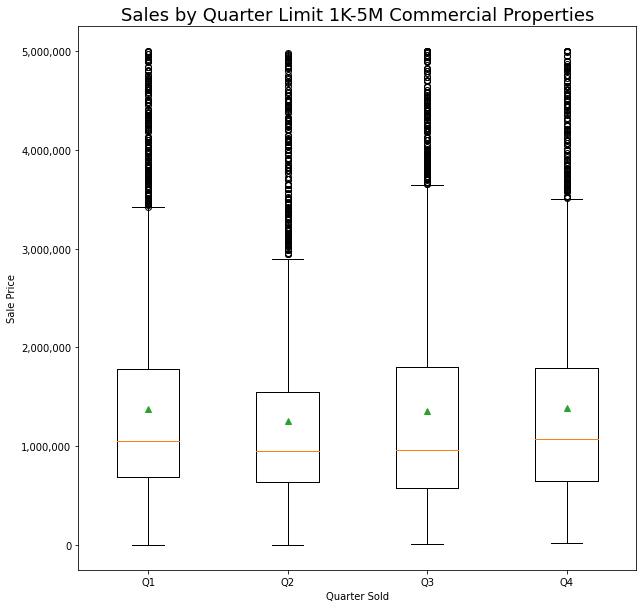

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Sales by Quarter Limit 1K-5M Commercial Properties", fontsize= 18)
ax.set

data = [c_rental['SALE PRICE'][c_rental['SALE QUARTER'] == 'Q1'],
        c_rental['SALE PRICE'][c_rental['SALE QUARTER'] == 'Q2'],
        c_rental['SALE PRICE'][c_rental['SALE QUARTER'] == 'Q3'],
        c_rental['SALE PRICE'][c_rental['SALE QUARTER'] == 'Q4']]

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.boxplot(data,
           labels= ['Q1', 'Q2', 'Q3', 'Q4'],
           showmeans= True)


#ax.ticklabel_format(axis= 'y',style='plain')

plt.xlabel("Quarter Sold")
plt.ylabel("Sale Price")

plt.show()

For commercial properties we have the most visible variance with Q2 being the best time to purchase new properties

**Third Research Question:** Does the age of the property have an effect on it's sales price.  First lets check what the average age is.

In [ ]:
df['YEAR BUILT'].describe()

count    84548.000000
mean      1789.322976
std        537.344993
min          0.000000
25%       1920.000000
50%       1940.000000
75%       1965.000000
max       2017.000000
Name: YEAR BUILT, dtype: float64

Since the min is 0 and the mean is so low we might be seeing a similar feature to the 0 cost sales. Lets visualize it.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


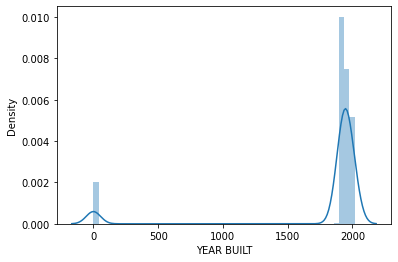

In [ ]:
ax = sns.distplot(df['YEAR BUILT'])

Quite a few 0 entries so I will filter those out by only looking at properties built from 1900 to present and apply the same pricing filters we have been using on the other models.

In [ ]:
p_age = df[(df['YEAR BUILT'] >= 1900) &
           (df['SALE PRICE'] > 1000) &
           (df['SALE PRICE'] <=5000000)]
p_age['YEAR BUILT'].describe()

count    51067.000000
mean      1952.382184
std         32.917691
min       1900.000000
25%       1925.000000
50%       1950.000000
75%       1972.000000
max       2017.000000
Name: YEAR BUILT, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


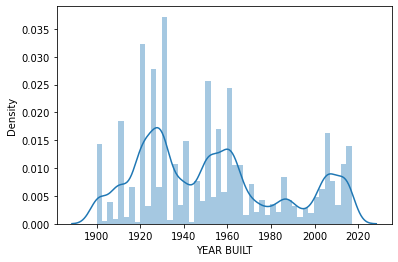

In [ ]:
ax = sns.distplot(p_age['YEAR BUILT'])

Once the filters have been applied we see a much more realistic distribution of property ages and the mean age of properties is 1952 so that will be our seperating point in comparing older properties to newer ones.

In [ ]:
p_age_old = p_age[p_age['YEAR BUILT'] < 1952]
p_age_new = p_age[p_age['YEAR BUILT'] >= 1952]
stats.ttest_ind(p_age_old['SALE PRICE'], p_age_new['SALE PRICE'])

Ttest_indResult(statistic=5.623155873919119, pvalue=1.8847731270271357e-08)

Significant difference found at the 95% confidence level so lets visualize that and look at the expected price difference

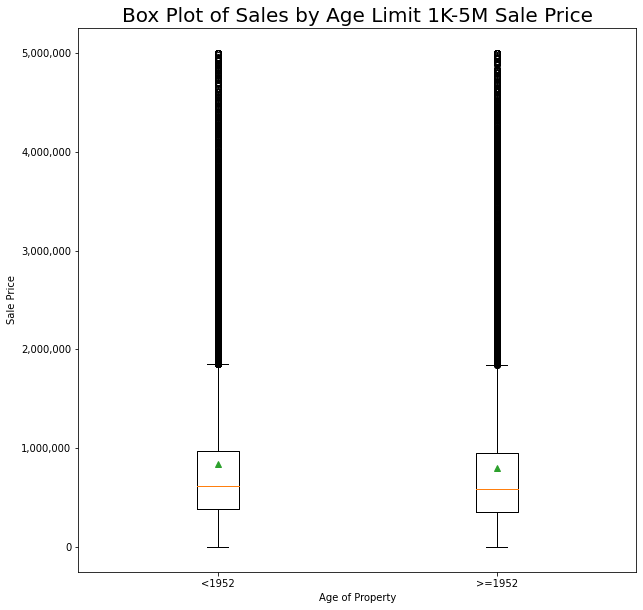

In [ ]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Sales by Age Limit 1K-5M Sale Price", fontsize= 20)
ax.set

data = [p_age_old['SALE PRICE'], 
        p_age_new['SALE PRICE']]

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.boxplot(data,
           labels= ['<1952', '>=1952'],
           showmeans= True)


#ax.ticklabel_format(axis= 'y',style='plain')

plt.xlabel("Age of Property")
plt.ylabel("Sale Price")

plt.show()

In [ ]:
get_95_ci(p_age_old['SALE PRICE'], p_age_new['SALE PRICE'])

'The difference in means at the 95% confidence interval (two-tail) is between -51191.19492331517 and -24772.45204889195.'

Looks like on average, with 95% confidence the newer properties are expected to be about 25-50k less than the older properties. It is worth keeping in mind that this is comparing all types of properties within NYC priced between 1k and 5M.

**Results:** 
If purchasing any type of property from 1k - 5M price then the best time to purchase will typically be from Q2-Q3. 

When considering to buy residential or commercial rental properties the residential properties will cost significantly less on average and the best time to buy them is in Q4. Commerical properties will be at their lowest cost on average from Q2-Q3.  

When only the age of properties costing between 1k and 5M is being considered the newer properties are slightly lower cost on average, but worth looking more into to see if that's further effected by the type of property.